For 1st dataset


 For K fold = 2
Metrics:
 [[0.998 0.998 0.998 0.998]
 [0.98  0.98  0.98  0.98 ]]
Mean Metrics: [0.989 0.989 0.989 0.989]
Variance Metrics: [8.1e-05 8.1e-05 8.1e-05 8.1e-05]


 For K fold = 3
Metrics:
 [[0.99101796 0.99101796 0.99101796 0.99101796]
 [0.99099099 0.99099099 0.99099099 0.99099099]
 [0.99099099 0.99099099 0.99099099 0.99099099]]
Mean Metrics: [0.99099998 0.99099998 0.99099998 0.99099998]
Variance Metrics: [1.61677131e-10 1.61677131e-10 1.61677131e-10 1.61677131e-10]


 For K fold = 5
Metrics:
 [[0.995 0.995 0.995 0.995]
 [0.99  0.99  0.99  0.99 ]
 [0.99  0.99  0.99  0.99 ]
 [0.985 0.985 0.985 0.985]
 [0.995 0.995 0.995 0.995]]
Mean Metrics: [0.991 0.991 0.991 0.991]
Variance Metrics: [1.4e-05 1.4e-05 1.4e-05 1.4e-05]


 For K fold = 10
Metrics:
 [[1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [0.99 0.99 0.99 0.99]
 [0.99 0.99 0.99 0.99]
 [0.99 0.99 0.99 0.99]
 [1.   1.   1.   1.  ]
 [0.99 0.99 0.99 0.99]
 [1.   

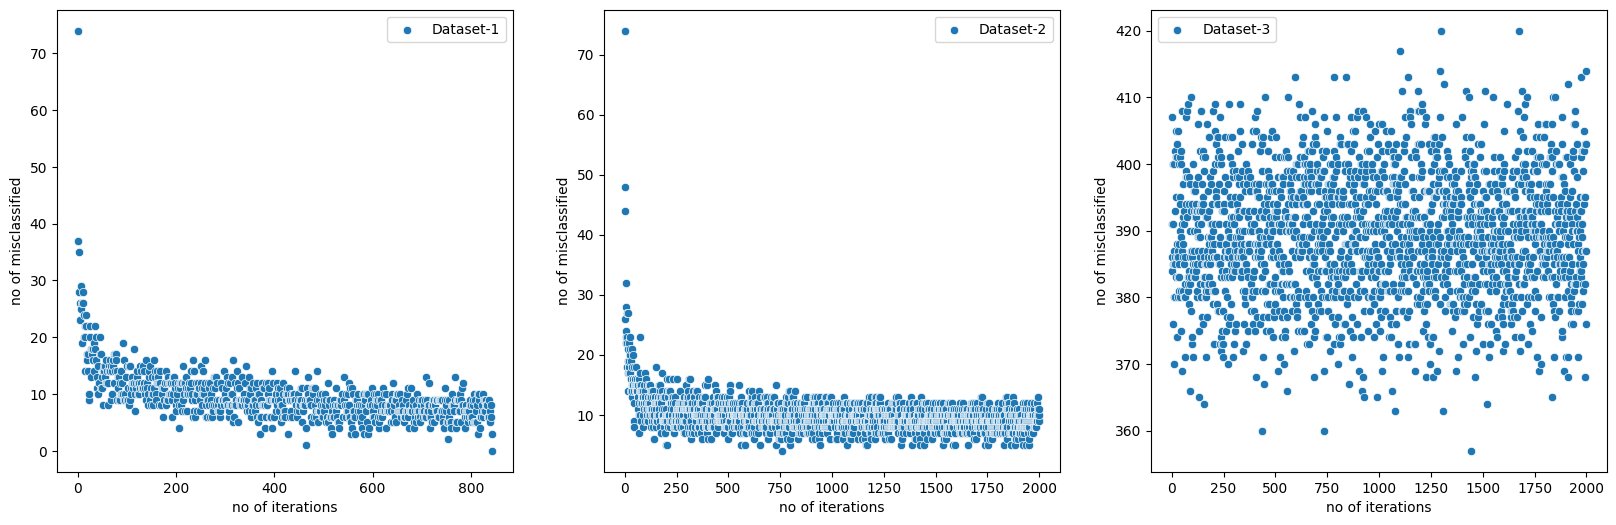

In [43]:
#Divyanshu Vaibhav
#21BT10014
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold

# Perceptron Learning Algorithm implementation
def perceptron_train(X, y, max_iterations=2000):
    no_samples, no_types = X.shape
    weights = np.zeros(no_types)
    bias = 0
    lrning_rate = 0.001
    ith_misclass=[]
    ith_iteration=[]
    for itr in range(max_iterations):
        no_misclass = 0

        for i in range(no_samples):
            prediction = np.sign(np.dot(X[i], weights) + bias)
            if prediction != y[i]:
                no_misclass += 1
                weights += lrning_rate * y[i] * X[i]
                bias += lrning_rate * y[i]

        ith_iteration.append(itr)
        ith_misclass.append(no_misclass)



        if no_misclass == 0:
            break

    return weights, bias, ith_iteration,ith_misclass

def perceptron_predict(X, weights, bias):
    predictions = np.sign(np.dot(X, weights) + bias)
    return predictions

# Loading Dataset-1
X1=np.load("/content/drive/MyDrive/Mlfa/asgn1/Dataset-1/inputs_Dataset-1.npy")
y1=np.load("/content/drive/MyDrive/Mlfa/asgn1/Dataset-1/outputs_Dataset-1.npy")

for i in range(len(y1)):
    if y1[i] == 0:
        y1[i] = -1
# Loading Dataset-2
X2=np.load("/content/drive/MyDrive/Mlfa/asgn1/Dataset-2/inputs_Dataset-2.npy")
y2=np.load("/content/drive/MyDrive/Mlfa/asgn1/Dataset-2/outputs_Dataset-2.npy")

for i in range(len(y2)):
    if y2[i] == 0:
        y2[i] = -1

# Loading Dataset-3
X3=np.load("/content/drive/MyDrive/Mlfa/asgn1/Dataset-3/inputs_Dataset-3.npy")
y3=np.load("/content/drive/MyDrive/Mlfa/asgn1/Dataset-3/outputs_Dataset-3.npy")

for i in range(len(y3)):
    if y3[i] == 0:
        y3[i] = -1


#For Dataset-1, we need to implement PLA on kfold splitted data
#Task a and b: Reporting values, mean, and variance of performance metrics for different values of K
k_values = [2,3,5,10]
print("For 1st dataset")
for k in k_values:
    kf = KFold(n_splits=k)
    metrics_kfold = []
    for train_index, test_index in kf.split(X1):
        X_train, X_test = X1[train_index], X1[test_index]
        y_train, y_test = y1[train_index], y1[test_index]

        weights, bias,ith_itr,ith_miscls = perceptron_train(X_train, y_train)
        y_pred = perceptron_predict(X_test, weights, bias)

        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred,average='micro')
        rec = recall_score(y_test, y_pred,average='micro')
        f1 = f1_score(y_test, y_pred,average='micro')

        metrics_kfold.append([acc, prec, rec, f1])

    print(f"\n\n For K fold = {k}")
    metrics_kfold_array = np.array(metrics_kfold)
    mean_metrics = np.mean(metrics_kfold_array, axis=0)
    var_metrics = np.var(metrics_kfold_array, axis=0)
    print("Metrics:\n", metrics_kfold_array)
    print("Mean Metrics:", mean_metrics)
    print("Variance Metrics:", var_metrics)



# Task c: Making an 80:20 train-test split and counting misclassified instances
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=10)
weights, bias,ith_itr,ith_misclss = perceptron_train(X_train, y_train)
df=pd.DataFrame(data=[ith_itr,ith_misclss]).T
df.columns=['no of iterations','no of misclassified']
fig,axes=plt.subplots(1,3,figsize=(20,6))
sns.scatterplot(data=df, x='no of iterations', y='no of misclassified', ax=axes[0],label="Dataset-1")

print("\n\n")
metrics_2nd=[]
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=10)
weights, bias,ith_itr,ith_misclss = perceptron_train(X_train, y_train)
y_pred=perceptron_predict(X_test,weights,bias)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred,average='micro')
rec = recall_score(y_test, y_pred,average='micro')
f1 = f1_score(y_test, y_pred,average='micro')
metrics_2nd=[acc, prec, rec, f1]
print("Metrics for 2nd dataset on test data: ",metrics_2nd)
df=pd.DataFrame(data=[ith_itr,ith_misclss]).T
df.columns=['no of iterations','no of misclassified']
sns.scatterplot(data=df, x='no of iterations', y='no of misclassified', ax=axes[1],label="Dataset-2")

print("\n\n")
metrics_3rd=[]
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.2, random_state=10)
weights, bias,ith_itr,ith_misclss = perceptron_train(X_train, y_train)
y_pred=perceptron_predict(X_test,weights,bias)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred,average='micro')
rec = recall_score(y_test, y_pred,average='micro')
f1 = f1_score(y_test, y_pred,average='micro')
metrics_3rd=[acc, prec, rec, f1]
print("Metrics for 3rd dataset on test data: ",metrics_3rd)
df=pd.DataFrame(data=[ith_itr,ith_misclss]).T
df.columns=['no of iterations','no of misclassified']
sns.scatterplot(data=df, x='no of iterations', y='no of misclassified', ax=axes[2],label="Dataset-3")
plt.show()
